In [ ]:
https://github.com/amitrajitbose/handwritten-digit-recognition
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Matplotlib is building the font cache; this may take a moment.


In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [104]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True)

In [105]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([512, 1, 28, 28])
torch.Size([512])


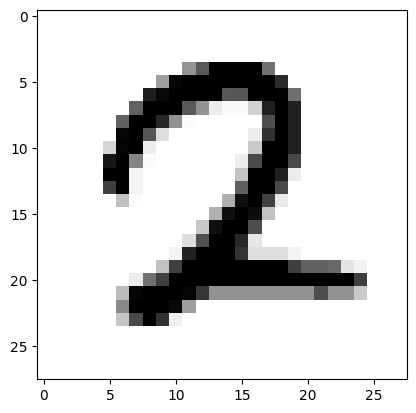

In [106]:
plt.imshow(images[12].numpy().squeeze(), cmap='gray_r');

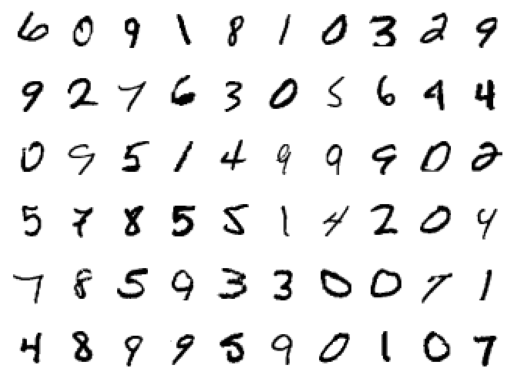

In [107]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [108]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [109]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [110]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 8.5429e-05,  8.5429e-05,  8.5429e-05,  ...,  8.5429e-05,
          8.5429e-05,  8.5429e-05],
        [-8.3564e-05, -8.3564e-05, -8.3564e-05,  ..., -8.3564e-05,
         -8.3564e-05, -8.3564e-05],
        [-3.6346e-04, -3.6346e-04, -3.6346e-04,  ..., -3.6346e-04,
         -3.6346e-04, -3.6346e-04],
        ...,
        [-1.2372e-04, -1.2372e-04, -1.2372e-04,  ..., -1.2372e-04,
         -1.2372e-04, -1.2372e-04],
        [-4.5193e-04, -4.5193e-04, -4.5193e-04,  ..., -4.5193e-04,
         -4.5193e-04, -4.5193e-04],
        [-1.2036e-03, -1.2036e-03, -1.2036e-03,  ..., -1.2036e-03,
         -1.2036e-03, -1.2036e-03]])


In [111]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.9398132097923149
Epoch 1 - Training loss: 0.8005602741140431
Epoch 2 - Training loss: 0.485753311191575
Epoch 3 - Training loss: 0.40217081470004584
Epoch 4 - Training loss: 0.361151322974997
Epoch 5 - Training loss: 0.33776984022835554
Epoch 6 - Training loss: 0.32012073885081177
Epoch 7 - Training loss: 0.30748569498122746
Epoch 8 - Training loss: 0.2936493735444748
Epoch 9 - Training loss: 0.2848940355292821
Epoch 10 - Training loss: 0.27494022654274763
Epoch 11 - Training loss: 0.2662406361709207
Epoch 12 - Training loss: 0.2559153709118649
Epoch 13 - Training loss: 0.24994618546659664
Epoch 14 - Training loss: 0.2415018360746109

Training Time (in minutes) = 2.0198354601860045


In [112]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


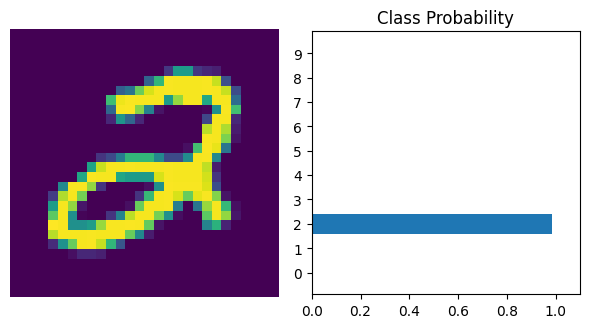

In [113]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9325


In [21]:
torch.save(model, './my_mnist_model.pt') 